In [1]:
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, roc_auc_score
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Configura para que os plots sejam exibidos diretamente no notebook
%matplotlib inline

# Seleção de Atributos

## Obtendo Dados

In [2]:
%run "./2) TCC - Análise e Exploração dos Dados.ipynb"
# Transformar variável alíquota em categorica com uma coluna para cada valor possível
df = pd.get_dummies(df, columns=['aliquota'], prefix='aliquota')
df['completa'] = df['completa'].astype('float64')
df['casado'] = df['casado'].astype('float64')
df['aliquota_0.0'] = df['aliquota_0.0'].astype('float64')
df['aliquota_7.5'] = df['aliquota_7.5'].astype('float64')
df['aliquota_15.0'] = df['aliquota_15.0'].astype('float64')
df['aliquota_22.5'] = df['aliquota_22.5'].astype('float64')
df['aliquota_27.5'] = df['aliquota_27.5'].astype('float64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49358 entries, 0 to 49357
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   valor_dirf          49358 non-null  float64
 1   rend_total          49358 non-null  float64
 2   rend_tributavel     49358 non-null  float64
 3   trabalho            49358 non-null  float64
 4   aluguel             49358 non-null  float64
 5   rend_capital        49358 non-null  float64
 6   autonomo            49358 non-null  float64
 7   livro_caixa         49358 non-null  float64
 8   rural               49358 non-null  float64
 9   ganho_capital       49358 non-null  float64
 10  exterior            49358 non-null  float64
 11  outros_rend         49358 non-null  float64
 12  rend_isento         49358 non-null  float64
 13  rend_exclusivo      49358 non-null  float64
 14  contrib_prev        49358 non-null  float64
 15  pensao_alimenticia  49358 non-null  float64
 16  gedu

## RFECV

Número ótimo de atributos : 10


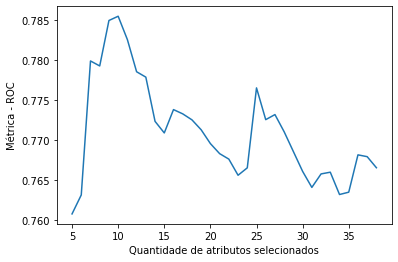

In [3]:
y = df.loc[:, ('alvo')].copy()
X = df.drop(['alvo'],axis=1)

rfc = RandomForestClassifier()
min_features_to_select = 5
roc_scorer = make_scorer(roc_auc_score)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(2),
              scoring=roc_scorer,
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)

print("Número ótimo de atributos : %d" % rfecv.n_features_)

# Mostrar o número de características x cross-validation score
plt.figure()
plt.xlabel("Quantidade de atributos selecionados")
plt.ylabel("Métrica - ROC")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [4]:
df_features = pd.DataFrame(rfecv.ranking_, columns=["ranking"])
df_features['atributo'] = X.columns
print("Atributos: ", np.array(df_features.query('ranking==1').atributo))
df_features.sort_values('ranking')

Atributos:  ['valor_dirf' 'rend_total' 'rend_tributavel' 'trabalho' 'rend_exclusivo'
 'contrib_prev' 'gmedicos' 'imposto_devido' 'iar' 'deducao']


,ranking,atributo
0,1,valor_dirf
22,1,deducao
20,1,iar
17,1,gmedicos
14,1,contrib_prev
13,1,rend_exclusivo
18,1,imposto_devido
1,1,rend_total
2,1,rend_tributavel
3,1,trabalho
